# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
gapminder = pd.read_csv('05_03/gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

### Goodness of Fit

In [8]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving', 'babies_per_woman', c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

Setting up model plot

In [9]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata), c=colors, s=30, linewidths=0.5, edgecolors='k', marker='D')

In [10]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [11]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [12]:
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving' '+ age5_surviving:region - age5_surviving + population', data=gdata).fit()

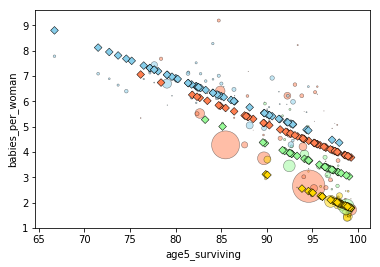

In [24]:
plotfit(surviving)

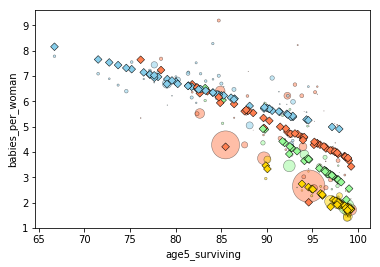

In [14]:
plotfit(surviving_byregion_population)

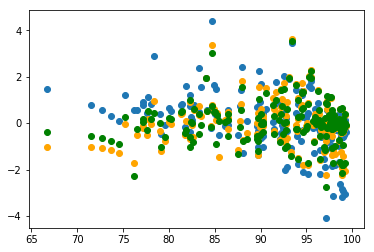

In [31]:
pp.scatter(gdata.age5_surviving, groupmeans.resid)
pp.scatter(gdata.age5_surviving, surviving.resid, color='orange')
pp.scatter(gdata.age5_surviving, surviving_byregion_population.resid, color='green')

In [23]:
for model in (groupmeans, surviving, surviving_byregion_population):
    print(model.mse_resid)

1.49795202637
0.942302533301
0.848022730057


Mean sqaured error is the first thing, and the simplest thing I look at. The R^2 is another statistic that gives us an idea of goodness of fit. It is given by the explained variance, the variance of the fitted model, divided by the total variance of the data. The maximum possible values for the R² is 1, and the minimum is 0. We get it as R² from the result objects.

<u>**Measures of good fit (in bold)**</u>

*** Mean squared error residuals ***

*** R^2 = (Explained variance) / (Total variance) ***

The expected result is between 1 and 0.

In [32]:
for model in (groupmeans, surviving, surviving_byregion_population):
    print(model.rsquared)

0.63646769656
0.772600908015
0.799977570789


***F statistic: explanatory power of fit parameters compared to "random" fit vectors***

As John von Neumann famously said, "With four parameters, I can fit an elephant, and with five, I can make him wiggle his trunk." So the F statistic measures how much, on average, each parameter contributes to the growth of the R², compared to a random model vector, that is, the hypothetical explanatory variable that has random values, and no link to the response variable at all. An F of 1 means that the parameter contributes the same as a random vector.

In [33]:
for model in (groupmeans, surviving, surviving_byregion_population):
    print(model.fvalue)

103.880039376
150.341806034
86.4878755673


<i> This shows that the surviving model seems to hit a sweet spot <i>

In [35]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           8.26e-56
Time:                        13:12:58   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# ANOVA table analysis of variance

In [39]:
sm.stats.anova_lm(groupmeans)

/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


Degrees of freedom, the number of parameters, and for the residual, the number of data points, minus the number of parameters. The sum squared and mean squared columns show the total and average explained in residual variance. We computed those already. The column F is the F statistic, and the last column is the P value for a known model with the same number of parameters as ours, but where all the terms are random.

In [40]:
sm.stats.anova_lm(surviving)

/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [41]:
sm.stats.anova_lm(surviving_byregion_population)

/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN
